# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [33]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

import warnings
warnings.filterwarnings("ignore")

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step - 2 (Download the dataset)

In [2]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!del cifar-10-python.tar.gz

--2022-01-12 06:59:16--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  44.3MB/s    in 4.2s    

2022-01-12 06:59:21 (39.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/bin/bash: del: command not found


### Step - 3 (Load the Dataset)

In [3]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

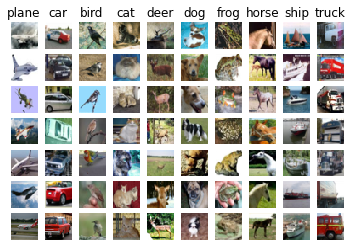

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [5]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
6. Measure the performance of model using various metrics and write in detail about each metric

## Logistic Regreesion 

***Intution*** :

It is a supervised learning algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In other words, the dependent variable is binary in nature having data coded as either 1 (success) or 0 (failure).

***Pros***:

1. Unlike Decision trees or SVM , this algorithm allows model to be updated easily to reflect new data.
2. It is  very efficient when the dataset has features that are linearly separable.
3. This algorithm can easily be extended to multi-class classification using a softmax classifier, this is known as Multinomial Logistic Regression.

***Cons***:

1. Non linear problems can't be solved with logistic regression since it has a linear decision surface.
2. It is difficult to capture complex relationships using logistic regression.
3.This algorithm is sensitive to outliers.

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [7]:
y_lr = lr.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
lr_ac = accuracy_score(y_test,y_lr)*100
lr_ac

32.4

## KNN

***Intution***:

K-NN algorithm assumes the similarity between the data and available cases and put the new case into the category that is most similar to the available categories. It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

Pros:

1. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function.
2. K-NN might take some time while selecting the first hyper parameter but after that rest of the parameters are aligned to it.
3. It is a non-parametric algorithm which means there are assumptions to be met to implement K-NN.



***Cons***:

1. The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
2. KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.
3. It requries feature scaling  before applying to any dataset. If we don't do so, KNN may generate wrong predictions.


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric= "minkowski", p=3)
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)

In [30]:
knn_ac = accuracy_score(y_test,y_knn)*100
knn_ac

23.200000000000003

## SVM

***Intution***:

In this, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

***Pros***:

1. It is effective in high dimensional spaces.
2. It is effective in cases where the number of dimensions is greater than the number of samples.
3. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

***Cons***:

1. It doesn’t perform well when we have large data set because the required training time is higher.
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping.
3. SVM doesn’t directly provide probability estimates, these are calculated using a five-fold cross-validation.

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=0)
svc.fit(X_train,y_train)
y_svc = svc.predict(X_test)

In [28]:
svc_ac = accuracy_score(y_test,y_svc)*100
svc_ac

28.000000000000004

In [13]:
svm = SVC(kernel="rbf", random_state=0)
svm.fit(X_train,y_train)
y_svm = svm.predict(X_test)

In [29]:
svm_ac = accuracy_score(y_test,y_svm)*100
svm_ac

40.400000000000006

## Naive Bayes

***Intution***:

In this the key difference is that naive bayes assumes that features are independent of each other and there is no correlation between features.



***Pros***:

1. The assumption that all features are independent makes naive bayes algorithm very fast compared to complicated algorithms.
2. It works well with high-dimensional data such as text classification, email spam detection.

***Cons***:

1. The assumption that all features are independent is not usually the case in real life so it makes naive bayes algorithm less accurate than complicated algorithms.

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_nb = nb.predict(X_test)

In [27]:
nb_ac = accuracy_score(y_test,y_nb)*100
nb_ac

28.999999999999996

## Decision Tree Model

***Intution***:

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

***Pros***:

1. Easy to understand and interpret, perfect for visual representation. This is an example of a white box model, which closely mimics the human decision-making process.
2. Can work with numerical and categorical features.
3. Non-parametric model: no assumptions about the shape of data.

***Cons***:

1. A small change in the data can cause a large change in the structure of the decision tree causing instability.
2. Decision tree often involves higher time to train the model.


In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
y_dt = dt.predict(X_test)

In [26]:
dt_ac = accuracy_score(y_test,y_dt)*100
dt_ac

21.2

## Random Forest

***Intution***:

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.


***Pros***:

1. It reduces overfitting in decision trees and helps to improve the accuracy
2. It is flexible to both classification and regression problems
3. It works well with both categorical and continuous values
4. It automates missing values present in the data.

***Cons***:

1. It requires much computational power as well as resources as it builds numerous trees to combine their outputs.
2. It also requires much time for training as it combines a lot of decision trees to determine the class.
3. Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators  = 50, criterion = 'entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [21]:
y_rf = rf.predict(X_test)

In [25]:
rf_ac = accuracy_score(y_test,y_rf)*100
rf_ac

38.4

## XG Boost

***Intution:***

XGBoost is an ensemble learning method. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.


***Pros:***

1. Gradient Boosting comes with an easy to read and interpret algorithm, making most of its predictions easy to handle.
2. Boosting is a resilient and robust method that prevents and cubs over-fitting quite easily
3. It performs very well on small and medium data with subgroups and structured datasets with not too many features.

***Cons:***

1. It does not perform  god on sparse and unstructured data.
2. Gradient Boosting is very sensitive to outliers since every classifier is forced to fix the errors in the predecessor learners.
3. The overall method is hardly scalable. This is because the estimators base their correctness on previous predictors, hence the procedure involves a lot of struggle to streamline.

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

array([2, 8, 8, 8, 4, 6, 3, 6, 5, 8, 0, 9, 1, 1, 9, 8, 5, 3, 8, 3, 9, 0,
       0, 1, 2, 6, 6, 9, 1, 6, 5, 2, 5, 3, 9, 1, 4, 9, 8, 5, 0, 6, 7, 4,
       0, 8, 5, 8, 4, 4, 9, 0, 6, 6, 8, 8, 5, 6, 8, 2, 6, 6, 6, 5, 6, 6,
       1, 0, 3, 9, 0, 6, 8, 8, 9, 2, 9, 5, 5, 0, 8, 1, 2, 0, 2, 7, 2, 8,
       8, 1, 8, 4, 8, 2, 4, 6, 4, 0, 2, 7, 2, 4, 6, 3, 1, 1, 6, 6, 5, 5,
       6, 5, 6, 2, 9, 7, 0, 9, 2, 5, 8, 4, 1, 7, 0, 6, 2, 5, 4, 0, 7, 1,
       8, 1, 3, 3, 9, 7, 6, 0, 6, 8, 1, 5, 1, 7, 6, 5, 5, 5, 9, 9, 6, 0,
       4, 6, 2, 9, 6, 0, 2, 1, 6, 4, 8, 7, 8, 6, 7, 9, 0, 7, 0, 8, 1, 9,
       8, 4, 3, 9, 0, 0, 4, 4, 7, 8, 6, 2, 9, 0, 4, 5, 5, 1, 7, 4, 8, 0,
       7, 5, 7, 9, 8, 7, 1, 5, 8, 4, 7, 8, 2, 1, 0, 9, 1, 3, 0, 9, 0, 4,
       7, 6, 1, 6, 9, 9, 9, 0, 3, 7, 5, 9, 5, 4, 8, 0, 4, 9, 0, 3, 1, 9,
       7, 9, 0, 1, 4, 8, 5, 1, 2, 5, 5, 7, 6, 0, 6, 9, 9, 3, 5, 1, 5, 6,
       0, 8, 8, 4, 7, 0, 4, 3, 6, 2, 9, 3, 0, 4, 4, 6, 9, 4, 0, 1, 8, 0,
       1, 8, 7, 9, 9, 4, 4, 1, 5, 4, 6, 0, 0, 6, 6,

In [37]:
xgb_ac = accuracy_score(y_test,xgb_pred)*100
xgb_ac

39.800000000000004

# Step - 7 (Compare all the models)

Conclude by following below mentioed steps -
1. Plot a table showing all the algorithms used and corresponding performance metrics
2. Is there any one algorithm that can be used on all the datasets? (Hint: Read about 'No Free Lunch' theorem)

In [39]:
import pandas as pd
models_acc = pd.DataFrame({'Model Accuracy' : [lr_ac, knn_ac, svc_ac, svm_ac, nb_ac,dt_ac,rf_ac, xgb_ac]}, 
             index = ['Logistic Regression', 'KNN','SVM-linear','SVM-kernel','Naive Bayes', 'Decison Tree', 'Random Forest', 'XGBoost'])
models_acc

,Model Accuracy
Logistic Regression,32.4
KNN,23.2
SVM-linear,28.0
SVM-kernel,40.4
Naive Bayes,29.0
Decison Tree,21.2
Random Forest,38.4
XGBoost,39.8
